<a href="https://colab.research.google.com/github/erick1439/CAP4630-Wocjan/blob/master/HW_5/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# **Description:**

Summarize and describe the different concepts/methods/algorithms that you have learned in this course.

# **Summary:**

## **General Concepts:**

### ***Artificial Intellegence:*** 

I learned that AI is an umbrella term used to represents a branch of computer science dealing with the simulation of intelligent behavior in computers.

### ***Symobolic AI:***
This is a term to used to respresent the collection of all methods in AI research that are based on high level representations of problems. This term is also know as "good old-fashioned Artificial Intelligence" or GOFAI.

### ***Machine Learning:***

I learned that this term is a subset of AI which is used to represent the field of study that gives computers the ability to learn without being explicitly programmed. This means that Machine Learning is the process of trainning a model to make useful predictions using a data set.

#### ***Supervised Learning:***
I learned that this is a paradigm from ML where a model will receive a label and training data. In the learing section, the model will do calculations to find patterns and relationships between the data and labels so when the model sees new data it can make close predictions.

#### ***Unsupervised Learning:***
In this type of learning the model will have only unlabeled data. This means that the model will have no hints on how to categorize data. This type of learning is more useful if we want to classify new data in already existing clusters of data.

#### ***Reinforcement Learning:***
I learned that on this type of learning you do not collect example with label. Instead we have an agent that will learn how to interact with an enviroment through trial and error using feedback from previous actions.

### **Deep Learning:**
Deep learning is a set of machine learning based on artificial neural networks. The learning can be supervised or unsupervised.

## **Basic Concepts:**

### **Linear Regression:**
Linear regression is a formula that attempts to model a relationship between variables. In the most basic example it will create a line where it maps a dependent variable to an independet variable. The linear regresion equation could be written as : $\hat y = mx + b$, but for this course the formula $\hat y = b + \sum_{j = 1}^n W_j X_j$ makes a better representation since it represents the linear regresion with multiple features.

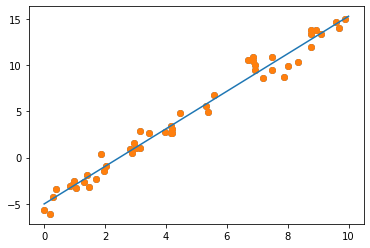

In [2]:
# Display data points on the graph
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

# Generates the linear regression line
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Displays the line on the graph
plt.scatter(x, y)
plt.plot(xfit, yfit);

### **Mean Square Error Loss:**
Loss defines the penalty for a bad prediction from a single weight. Mean square error refers to the average squared loss per example over the whole dataset. The MSE can be represented as: $ \frac{1}{m} \sum_{i = 1}^m (y^i - \hat y^i)^2$

### Binary crossentropy:

Binary crossentropy is another type of loss function used primarly with logistic regression. Binary crossentropy will measure how far away from a true value a prediction will be measuring the loss.

In [0]:
def binary_cross_entropy_loss(a, label):
    return (-label * np.log(a)) - ((1 - label) * np.log(1 - a))

### **Logistic Regression:**
This is a supervised learning algorithm that allow us to predict if something is true or false. Instead of having predictions for continious values like in linear regression, we will us logistic regression to classify data into two categories.

### **Gradients:**
Gradients are vectors containing derivaties of functions with respect to all of its variables. One of the uses of gradients is to find the steepst ascent for a function at a given point.

Below is an expalme of the gradient descent ot the function cos(x) + sin(y) at the point $(0, - \frac{\pi}{2})$

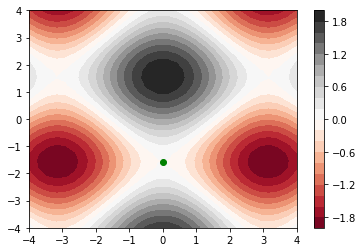

In [4]:
def f3(x, y):
  return np.cos(x) + np.sin(y)

x = np.linspace(-4, 4, 30)
y = np.linspace(-4, 4, 30)

X, Y = np.meshgrid(x, y)
Z = f3(X, Y)

plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()
plt.plot(0, -np.pi / 2, 'o', c='green')
plt.show()

### **Gradient Descent:**
This a technique we use to minimized the error loss of a model by adjusting its weights. This optimization technique works by iteratively moving in the direction of the functions's steepest descent. 


### **Stochastic/ Mini Batch Gradient Descent:**
Stochastic and Mini batch are two modifications of gradiant descent. Running the gradieant descent algorithm can be very costly because of the many math computations the algorith will have to compute with big sets of data. To prevent this we can use Stochastic and mini batch gradient descent. Sotachistic will randomly select a element from the training set at each step. In the other side, the mini batch will use a small collection of randomly choosed elements from the training set.


## **Building a Model:**

Keras allows us to build neural networks in a condese way. In the lines below we are creating a sequential model which will organize out the layer in stack looking fashion. After that, we are inserting a dense layer to the model that will use a sigmod activation. The sigmoid argument will make sure that our output is between the interval 0 to 1.

In [5]:
%tensorflow_version 2.x
import tensorflow as tf

# Creates the model
model = tf.keras.models.Sequential()

# Adds dense layer to the model
layer = tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2, ))
model.add(layer)

# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### **Types of layers:**

There are different types of layers that keras offer. The dense layer used above is just one of the many. Below are just some layers we have come across:

#### **Dense:**

Dense is one of the most basic types of layers. This layer uses the gradiant descent technique to adjust the features.

#### **Flatten:**

The flatten layer can take an input of multiple dimesion and flatten that into a 1d array.

#### **Conv2D:**

This layer works by reciving an input matrix and a kernel. Then this kernel will be used to multiply the input matrix on a specific region of the input matrix and then add its products. This process will continue until the all the input matrix positions have been processed. The code below is the example from hw4 that computes the conv2d on squares matrices.

In [6]:
import numpy as np

def conv2d(input_mat, kernel_mat):
    # Special cases in order to avoid errors on the computation.

    if kernel_mat.shape[0] != kernel_mat.shape[1]:
      return "Kernel matrix is not square"
    
    if input_mat.shape[0] != input_mat.shape[1]:
      return "Input matrix is not square"

    if kernel_mat.shape[0] > input_mat.shape[0]:
      return "Kernel size is greater than the input size"

    # Statements that calculate the new length of the result matrix.
    result_mat = np.zeros((input_mat.shape[0] - kernel_mat.shape[0] + 1, input_mat.shape[0] - kernel_mat.shape[0] + 1))

    # Loops that calculate the convolution computations
    for col in range(result_mat.shape[0]):
        for row in range(result_mat.shape[1]):
          x_bound = row + kernel_mat.shape[0];
          y_bound = col + kernel_mat.shape[0]
          temp_mat = np.multiply(input_mat[col:y_bound, row:x_bound], kernel_mat)
          result_mat[col][row] = np.sum(temp_mat)

    return result_mat


# Test case : 
input_mat = np.array([[1, 2, 3],
                      [1, 2, 3],
                      [1, 2, 3]])

kernel_mat = np.array([[1, 1],
                       [1, 1]])

print(conv2d(input_mat, kernel_mat), end="\n\n")

[[ 6. 10.]
 [ 6. 10.]]



#### **MaxPooling2D:**

This layer works get the max number from a region specified by a value passed as another parameter. This tehcnique will also stop when all the values of the input matrix have been processed. The example below is from hw4 that works only with only square matrices.

In [7]:
import numpy as np

def maxpooling2d(input_mat, s):

  # Special cases in order to avoid errors on the computation.
  if input_mat.shape[0] != input_mat.shape[1]:
    return "Input Matrix is not square"

  if s <= 0:
    return "Make sure the value in s is valid"

  if s > input_mat.shape[0]:
    return "The value in s is largert the input size"

  # Statements that calculate the new length of the result matrix.
  result_mat = np.zeros((input_mat.shape[0] // s, input_mat.shape[0] // s))

  # Perform the max pooling operation
  for col in range(result_mat.shape[0]):
    for row in range(result_mat.shape[0]):
      x_bound = row * s
      y_bound = col * s
      result_mat[col][row] = np.amax(input_mat[y_bound:y_bound + s, x_bound:x_bound + s])

  return result_mat


# Test case:
input_mat = np.array([[1, 2, 3, 4],
                      [5, 6, 7, 8],
                      [9, 10, 11, 12],
                      [13, 14, 15, 16]])

print(maxpooling2d(input_mat, 2), end="\n\n")

[[ 6.  8.]
 [14. 16.]]



## **Comping a Model:**

The model above can be compiled with the line below. The optimizer parameter is in charge to set how the data is going to be updated at each iteration. The loss parameter is in charge to set the algorithm that it will be used to calculate the loss.

In [0]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01), loss='binary_crossentropy', metrics=['accuracy'])

## **Training a Model:**

#### ***Overfitting:***

Overfitting is a pitfall where a model will train training-data too well. This is bad because because it will cause big loss in unseen data. This usually happens when the model learns the noise and the detail rules for the training. One of the ways to avoid this problem is by using more general rules to train the data.

#### ***Underfitting:***

Underfitting refers to a model that can not train data or generalize new data. To fix this, we can change the learning rate or increase the amount of the training.

#### **Training model Example:**


The example below is part of hw3 that implements logistic regresion with two features and training data from the get_random() mehtod.

In [9]:
def get_random_data(w, b, mu, sigma, m):
  # Generates array with ones and zeros.
  labels = np.random.choice([0, 1], size=(m,1))
  
  # Generates uniformly random data.
  X_1 = np.random.uniform(0, 1, size=(m, 1))

  # Generates random data with mean distribution of mu, and sd of sigma.
  N = np.random.normal(mu, sigma, size=(m, 1))

  # Sets the second feature
  X_2 = w * X_1 + b + (-1)**labels * N

  # Concatenates the features X_1 & X_2 to produce the array with a shape of (m, 2).
  data = np.concatenate((X_1, X_2), axis=1)

  return data, labels

def split_data(data, labels):
  # Splits the data with a 80:20 ratio
  train_data = data[:(int)(m * 0.8)]
  test_data = data[(int)(m * 0.8):]
  train_labels = labels[:(int)(m * 0.8)]
  test_labels = labels[(int)(m * 0.8):]

  return train_data, test_data, train_labels, test_labels

def display_random_data (data, labels, w, b):
  # Display data points 
  pt = labels.flatten()
  temp1 = data[pt == 0,:]
  temp2 = data[pt == 1,:]
  plt.scatter(temp1[:,0], temp1[:,1], c='blue', label='X_1')
  plt.scatter(temp2[:,0], temp2[:,1], c='red', label='X_2')

  # Displays line that splits the data
  slope = np.linspace(0, 1)
  y = w * slope + b
  plt.plot(slope, y, 'black')

  # Labels the graph
  plt.title('Data Distribution')
  plt.xlabel('$Y$')
  plt.ylabel('$X$')


w = 2
b = 7
mu = 4
sigma = 1.5
m = 1000

data, labels = get_random_data(w, b, mu, sigma, m)
train_data, test_data, train_labels, test_labels = split_data(data, labels)

epochs = 50
batch_size = 40

# Creates the model
model = tf.keras.models.Sequential()

# Adds dense layer to the model
layer = tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2, ))
model.add(layer)

# Compiles the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Trains the model
model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_data, test_labels))

Epoch 1/50
20/20 [==============================] - 0s 9ms/step - loss: 4.3784 - accuracy: 0.4975 - val_loss: 4.0290 - val_accuracy: 0.4350
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 3.0023 - accuracy: 0.4775 - val_loss: 2.6504 - val_accuracy: 0.3950
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 1.8742 - accuracy: 0.3688 - val_loss: 1.4843 - val_accuracy: 0.1800
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 1.1342 - accuracy: 0.0787 - val_loss: 0.9122 - val_accuracy: 0.2350
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.8521 - accuracy: 0.4338 - val_loss: 0.7465 - val_accuracy: 0.5550
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.7451 - accuracy: 0.4975 - val_loss: 0.6616 - val_accuracy: 0.5550
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.4975 - val_loss: 0.5979 - val_accuracy: 0.5550
Epoch 8/50
20/20 [==

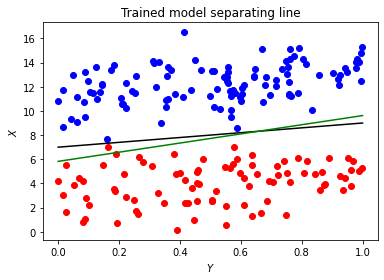

In [10]:
def display_trained_model_line():
  W, b = layer.get_weights()
  slope = np.linspace(0, 1)
  Y = -((W[0] * slope + b) / W[1])
  plt.title('Trained model separating line')
  plt.plot(slope, Y, color='green')
  plt.show()

display_random_data(test_data, test_labels, w, b)
display_trained_model_line()

## **Finetuning a pretrained model**

The snippets of code below are from hw4 and show the main steps of fine tuning. 
For finetuning we can unfreeze some layers to make them trainable. It is preferable to choose layer that are at the top rather than the ones at the bottom. This it will be easier to increase the accuracy.

The code below creates a pretrainded model with the Xception convolutional base.

In [11]:
from keras.applications.xception import Xception

conv_base = Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

conv_base.summary()

Using TensorFlow backend.


Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

Concanates the of convolutional base

In [0]:
conv_base.trainable = False

In [13]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 33,969,193
Trainable params: 13,107,713
Non-trainable params: 20,861,480
_________________________________________________________________


The snippet of code below unfreezes the layer block10_sepconv1 and it also shows some of the trainable layer after a certain level.

In [14]:
conv_base.trainable = True

set_trainable = False

print("TRAINABLE LAYERS:\n")
for layer in conv_base.layers:
  if layer.name == 'block10_sepconv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
    print(layer.name)
  else:
    layer.trainable = False
  

TRAINABLE LAYERS:

block10_sepconv1
block10_sepconv1_bn
block10_sepconv2_act
block10_sepconv2
block10_sepconv2_bn
block10_sepconv3_act
block10_sepconv3
block10_sepconv3_bn
add_9
block11_sepconv1_act
block11_sepconv1
block11_sepconv1_bn
block11_sepconv2_act
block11_sepconv2
block11_sepconv2_bn
block11_sepconv3_act
block11_sepconv3
block11_sepconv3_bn
add_10
block12_sepconv1_act
block12_sepconv1
block12_sepconv1_bn
block12_sepconv2_act
block12_sepconv2
block12_sepconv2_bn
block12_sepconv3_act
block12_sepconv3
block12_sepconv3_bn
add_11
block13_sepconv1_act
block13_sepconv1
block13_sepconv1_bn
block13_sepconv2_act
block13_sepconv2
block13_sepconv2_bn
conv2d_4
block13_pool
batch_normalization_4
add_12
block14_sepconv1
block14_sepconv1_bn
block14_sepconv1_act
block14_sepconv2
block14_sepconv2_bn
block14_sepconv2_act


## **Conclusion:**

Throught out this course I have been able to learn some really intersting topics on the area of machine learning. Now that the class is over I still see myself learning more about this field and its concepts.